In [144]:
import pandas as pd
import numpy as np
import random 

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches

In [145]:
NumSim = 1

# Simulation1 -- 50 Nodes

In [146]:
class Suspectible: 
    def __init__(self, opinion): 
        self.opinion = opinion
        
class Zealot_right: 
    def __init__(self, opinion): 
        self.opinion = 1
        
class Zealot_left: 
    def __init__(self, opinion): 
        self.opinion = 0
        
class PeaceMakers: 
    def __init__(self, opinion): 
        self.opinion = 0.5
        
alpha = 0.5
epsilon_normal = 0.1 
epsilon_zealot = 0.5
t_max = 2000
N = 50 
Z = 2  
P = 2

In [147]:
for k in range(0, NumSim):
    
    ## Setting up Susecptible Population  
    population = []

    random.seed(100)

    for i in range(0, N): 
        n = Suspectible(round(np.random.normal(loc = 0.5, scale = 0.15), 2))
        population.append(n)

    ## Setting up zealot nodes
    for z in range(0, int(Z / 2)):
        z_r = Zealot_right(1)
        z_l = Zealot_left(0)
        population.append(z_r)
        population.append(z_l)

    ## Data Frame for graphing 
    df_1 = pd.DataFrame(np.nan, index=range(0, t_max + 1), columns= range(1, N + Z))

    for i in range(0, N + Z):
        df_1.loc[0,i + 1] = population[i].opinion
    
    
    extremists = (sum(df_1.iloc[0,] >= .8) + sum(df_1.iloc[0,] <= .2)) / (N + Z)

    print(k, "- Initial Extremists:", extremists)
    
    ## Creating weight list
    weight = np.repeat(0.1, N)
    weight_list = weight.tolist()

    for w in range(0, Z): 
        weight_list.append(4)
    
    i = 0 

    while(i < t_max):
    
        ## Keeps track of when zealots are chosen
        n0_zealot = False 
        n1_zealot = False
        both_zealot = False  
    
        one_peacemaker = False 
        both_peacemakers = False 
    
        ## Selects the two nodes 
        sample_nodes = random.choices(population, weights = weight_list, k = 2)
    
        ## Writes down the opinion of the two nodes
        n0_opinion = sample_nodes[0].opinion 
        n1_opinion = sample_nodes[1].opinion
    
        ## Checks what nodes we have 
        if (isinstance(sample_nodes[0], Zealot_right) or isinstance(sample_nodes[0], Zealot_left)): 
            n0_zealot = True 
        
        if (isinstance(sample_nodes[1], Zealot_right) or isinstance(sample_nodes[1], Zealot_left)): 
            n1_zealot = True 
    
        ## Checks if both zealots are chosen 
        if (n0_zealot == True and n1_zealot == True):
            both_zealot = True
        
    
        ## PeaceMakers
    
        if (isinstance(sample_nodes[0], PeaceMakers) or isinstance(sample_nodes[1], PeaceMakers)): 
            one_peacemaker = True 
        
        if (isinstance(sample_nodes[0], PeaceMakers) and isinstance(sample_nodes[1], PeaceMakers)): 
            both_peacemakers = True 
    
    
        ## Zealots opinion only 
        if (both_zealot == False and 
            one_peacemaker == False and 
            abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_zealot): 
                
            if (n0_zealot == True and both_zealot == False):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
        
            
            if (n0_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and 
            n1_zealot == False and 
            one_peacemaker == True): 
            
            if(isinstance(sample_nodes[0], PeaceMakers)):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
            
            if(isinstance(sample_nodes[1], PeaceMakers)):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and n1_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal): 
            sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
            sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
        ## Update data frame for info 
        for j in range(0, N + Z):
            df_1.loc[i, j + 1] = population[j].opinion
      
        extremists = (sum(df_1.iloc[i,] >= .8) + sum(df_1.iloc[i,] <= .2)) / (N + Z)
        i = i+1 
    
    ## Checking 
    print(k, "- End Extremists:", extremists)


0 - Initial Extremists: 0.038461538461538464
0 - End Extremists: 1.0


In [148]:
#df_1.to_excel("Example_Sim1.xlsx")

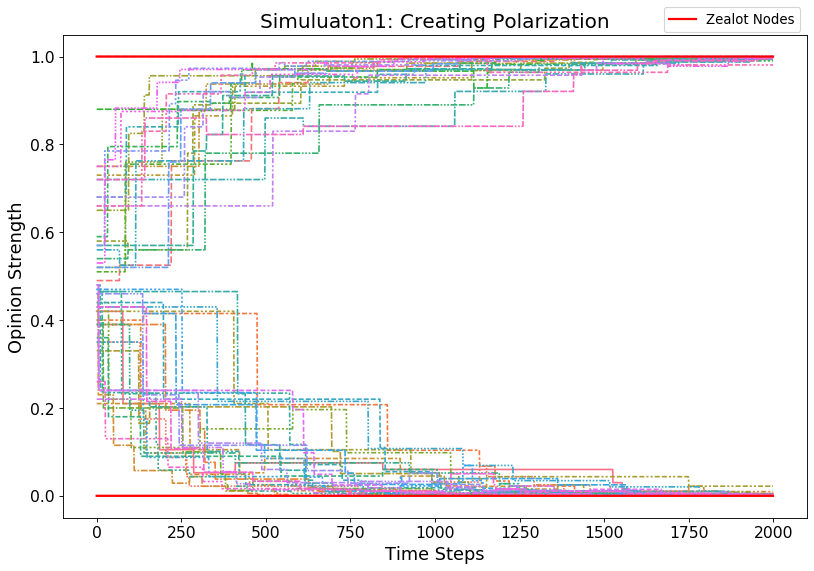

In [150]:
## (width, height)
#figure(figsize=(14, 10), dpi=80)

figure(figsize=(12, 8), dpi=80)

Graph1Sim1 = sns.lineplot(data = df_1, legend = None)
plt.plot(df_1[51], linewidth = 2, color = "red", label = "Zealot Nodes")
plt.plot(df_1[52], linewidth = 2, color = "red")
plt.legend(loc="upper right", prop={'size': 12}, bbox_to_anchor=(1, 1.07))


plt.title('Simuluaton1: Creating Polarization', fontsize = 18)
plt.ylabel('Opinion Strength', fontsize = 16)
plt.xlabel('Time Steps', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

#plt.savefig('ExampleSim1.png')


# Simulation2 -- 50 Nodes

In [154]:
class Suspectible: 
    def __init__(self, opinion): 
        self.opinion = opinion
        
class Zealot_right: 
    def __init__(self, opinion): 
        self.opinion = 1
        
class Zealot_left: 
    def __init__(self, opinion): 
        self.opinion = 0
        
class PeaceMakers: 
    def __init__(self, opinion): 
        self.opinion = 0.5
        
alpha = 0.5
epsilon_normal = 0.1 
epsilon_zealot = 0.5
t_max = 2000 
N = 50 
Z = 2  
P = 2

In [155]:
df_initial_opinions_50 = pd.read_excel("EndOpinions_50.xlsx")
df_initial_opinions_50 = df_initial_opinions_50.drop(columns=['Unnamed: 0'])
df_initial_opinions_50

,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
0,0.067500,0.945000,0.908750,0.175000,0.983125,0.968750,0.938125,0.112500,0.195000,0.910,...,0.012656,0.940000,0.072500,0.877500,0.032500,0.019375,0.200000,0.938750,1,0
1,0.070625,0.970781,0.018027,0.225000,0.995938,0.021240,0.006945,0.049766,0.940000,0.115,...,0.005898,0.970313,0.016289,0.021240,0.765000,0.975000,0.073750,0.985313,1,0
2,0.952637,0.056250,0.011875,0.943125,0.014063,0.995625,0.000508,0.790000,0.902500,0.145,...,0.805000,0.981875,0.989375,0.020273,0.024375,0.976641,0.080937,0.111250,1,0
3,0.991116,0.978438,0.021250,0.195000,0.001719,0.001641,0.011720,0.116250,0.952500,0.235,...,0.006133,0.973281,0.978438,0.911250,0.800000,0.005860,0.808750,0.981328,1,0
4,0.073438,0.061562,0.949062,0.938750,0.010049,0.020771,0.000244,0.760000,0.029375,0.245,...,0.906250,0.974219,0.988437,0.907188,0.935000,0.980000,0.825000,0.972500,1,0


In [156]:
for k in range(0, NumSim):
    
    ## Setting up Susecptible Population  
    population = []

    random.seed(100)
    
    for i in range(0, N): 
        opinion = df_initial_opinions_50.iloc[k,i]
        n = Suspectible(opinion)
        population.append(n)
        

    ## Setting up zealot nodes
    for z in range(0, int(Z / 2)):
        z_r = Zealot_right(1)
        z_l = Zealot_left(0)
        population.append(z_r)
        population.append(z_l)
        
        
    ## Setting up the peacemaker nodes
    for p in range(0, P):
        pm = PeaceMakers(0.5)
        population.append(pm)
    
    
    ## Data Frame for graphing 
    df_2 = pd.DataFrame(np.nan, index=range(0, t_max + 1), columns= range(1, N + Z + P))

    for i in range(0, N + Z + P):
        df_2.loc[0,i + 1] = population[i].opinion
    
    
    extremists = (sum(df_2.iloc[0,] >= .8) + sum(df_2.iloc[0,] <= .2)) / (N + Z)

    print(k, "- Initial Extremists:", extremists)
    
    ## Creating weight list
    weight = np.repeat(0.1, N)
    weight_list = weight.tolist()

    ## Zealot Weight
    for w in range(0, Z): 
        weight_list.append(4)
    
    ## Peacemaker Weight
    for w in range(0, P): 
        weight_list.append(40)
    
    i = 0 

    print("Going into while", k)
    while(i < t_max):
    #while(extremists > 0.05):
    #while(i < t_max):
    
        ## Keeps track of when zealots are chosen
        n0_zealot = False 
        n1_zealot = False
        both_zealot = False  
    
        one_peacemaker = False 
        both_peacemakers = False 
    
        ## Selects the two nodes 
        sample_nodes = random.choices(population, weights = weight_list, k = 2)
    
        ## Writes down the opinion of the two nodes
        n0_opinion = sample_nodes[0].opinion 
        n1_opinion = sample_nodes[1].opinion
    
        ## Checks what nodes we have 
        if (isinstance(sample_nodes[0], Zealot_right) or isinstance(sample_nodes[0], Zealot_left)): 
            n0_zealot = True 
        
        if (isinstance(sample_nodes[1], Zealot_right) or isinstance(sample_nodes[1], Zealot_left)): 
            n1_zealot = True 
    
        ## Checks if both zealots are chosen 
        if (n0_zealot == True and n1_zealot == True):
            both_zealot = True
        
    
        ## PeaceMakers
    
        if (isinstance(sample_nodes[0], PeaceMakers) or isinstance(sample_nodes[1], PeaceMakers)): 
            one_peacemaker = True 
        
        if (isinstance(sample_nodes[0], PeaceMakers) and isinstance(sample_nodes[1], PeaceMakers)): 
            both_peacemakers = True 
    
    
        ## Zealots opinion only 
        if (both_zealot == False and 
            one_peacemaker == False and 
            abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_zealot): 
                
            if (n0_zealot == True and both_zealot == False):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
        
            
            if (n0_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and 
            n1_zealot == False and 
            one_peacemaker == True): 
            
            if(isinstance(sample_nodes[0], PeaceMakers) and isinstance(sample_nodes[1], PeaceMakers) == False):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
            
            if(isinstance(sample_nodes[1], PeaceMakers) and isinstance(sample_nodes[0], PeaceMakers) == False):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and n1_zealot == False and 
            isinstance(sample_nodes[0], PeaceMakers) == False and 
            isinstance(sample_nodes[1], PeaceMakers) == False and 
            abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal): 
            sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
            sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
        ## Update data frame for info 
        for j in range(0, N + Z + P):
            df_2.loc[i, j + 1] = population[j].opinion
      
        extremists = (sum(df_2.iloc[i,] >= .8) + sum(df_2.iloc[i,] <= .2)) / (N + Z + P)
        i = i+1 
    
    
    
    ## Checking 
    print(k, "- End Extremists:", extremists)
   

0 - Initial Extremists: 0.9615384615384616
Going into while 0
0 - End Extremists: 0.037037037037037035


In [157]:
#df_2.to_excel("Example_Sim2.xlsx")

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

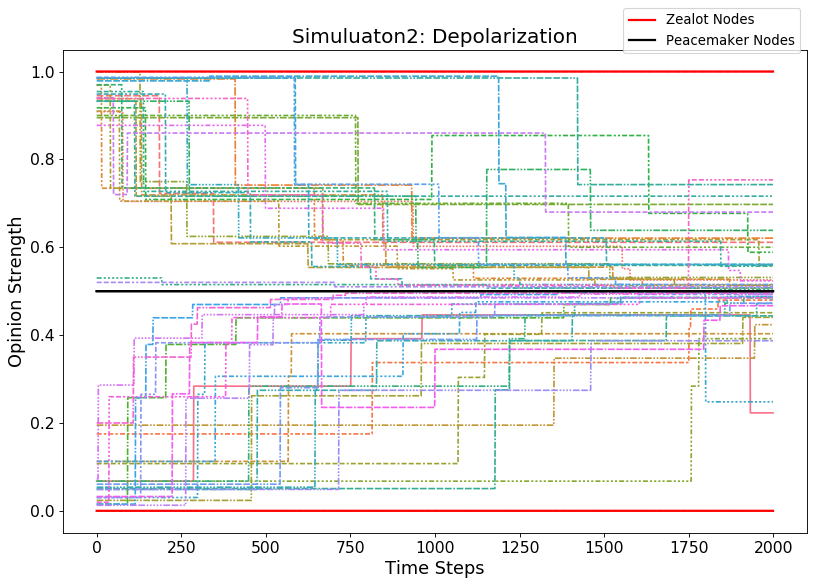

In [160]:
## (width, height)
figure(figsize=(12, 8), dpi=80)

Graph1Sim1 = sns.lineplot(data = df_2, legend = None)
plt.plot(df_1[51], linewidth = 2, color = "red", label = "Zealot Nodes")
plt.plot(df_1[52], linewidth = 2, color = "red")
plt.plot(df_2[53], linewidth = 2, color = "black", label = "Peacemaker Nodes")
plt.plot(df_2[54], linewidth = 2, color = "black")
plt.legend(loc="upper right", prop={'size': 12}, bbox_to_anchor=(1, 1.1))

plt.title('Simuluaton2: Depolarization', fontsize = 18)
plt.ylabel('Opinion Strength', fontsize = 16)
plt.xlabel('Time Steps', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

#plt.savefig('ExampleSim2.png')


# Simulation3 -- 50 Nodes

In [161]:
class Suspectible: 
    def __init__(self, opinion): 
        self.opinion = opinion
        
class Zealot_right: 
    def __init__(self, opinion): 
        self.opinion = 1
        
class Zealot_left: 
    def __init__(self, opinion): 
        self.opinion = 0
        
class PeaceMakers: 
    def __init__(self, opinion): 
        self.opinion = 0.5
        
alpha = 0.5
epsilon_normal = 0.1 
epsilon_zealot = 0.5

t_max = 2000
N = 50
Z = 2  
P = 2

In [162]:
for k in range(0, NumSim):
    
     ## Setting up Susecptible Population  
    population = []

    random.seed(100)
    
    for i in range(0, N): 
        n = Suspectible(round(np.random.normal(loc = 0.5, scale = 0.15), 2))
        population.append(n)
        

    ## Setting up zealot nodes
    for z in range(0, int(Z / 2)):
        z_r = Zealot_right(1)
        z_l = Zealot_left(0)
        population.append(z_r)
        population.append(z_l)
        
        
    ## Setting up the peacemaker nodes
    for p in range(0, P):
        pm = PeaceMakers(0.5)
        population.append(pm)
    
    
    ## Data Frame for graphing 
    df_3 = pd.DataFrame(np.nan, index=range(0, t_max + 1), columns= range(1, N + Z + P))

    for i in range(0, N + Z + P):
        df_3.loc[0,i + 1] = population[i].opinion
    
    
    extremists = (sum(df_3.iloc[0,] >= .8) + sum(df_3.iloc[0,] <= .2)) / (N + Z + P)

    print(k, "- Initial Extremists:", extremists)
    
    ## Creating weight list
    weight = np.repeat(0.1, N)
    weight_list = weight.tolist()

    ## Zealot Weight
    for w in range(0, Z): 
        weight_list.append(4)
    
    ## Peacemaker Weight
    for w in range(0, P): 
        weight_list.append(6)
        
    i = 0 

    print("Going into while", k)
    while(i < t_max):

    
        ## Keeps track of when zealots are chosen
        n0_zealot = False 
        n1_zealot = False
        both_zealot = False  
    
        one_peacemaker = False 
        both_peacemakers = False 
    
        ## Selects the two nodes 
        sample_nodes = random.choices(population, weights = weight_list, k = 2)
    
        ## Writes down the opinion of the two nodes
        n0_opinion = sample_nodes[0].opinion 
        n1_opinion = sample_nodes[1].opinion
    
        ## Checks what nodes we have 
        if (isinstance(sample_nodes[0], Zealot_right) or isinstance(sample_nodes[0], Zealot_left)): 
            n0_zealot = True 
        
        if (isinstance(sample_nodes[1], Zealot_right) or isinstance(sample_nodes[1], Zealot_left)): 
            n1_zealot = True 
    
        ## Checks if both zealots are chosen 
        if (n0_zealot == True and n1_zealot == True):
            both_zealot = True
        
    
        ## PeaceMakers
    
        if (isinstance(sample_nodes[0], PeaceMakers) or isinstance(sample_nodes[1], PeaceMakers)): 
            one_peacemaker = True 
        
        if (isinstance(sample_nodes[0], PeaceMakers) and isinstance(sample_nodes[1], PeaceMakers)): 
            both_peacemakers = True 
    
    
        ## Zealots opinion only 
        if (both_zealot == False and 
            one_peacemaker == False and 
            abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_zealot): 
                
            if (n0_zealot == True and both_zealot == False):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
        
            
            if (n0_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
            if (n1_zealot == True and both_zealot == False and abs(sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
        ## Peacemaker only 
        if (n0_zealot == False and 
            n1_zealot == False and 
            one_peacemaker == True): 
            
            if(isinstance(sample_nodes[0], PeaceMakers)):
                sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
            
            if(isinstance(sample_nodes[1], PeaceMakers)):
                sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
    
    
        if (n0_zealot == False and n1_zealot == False and 
            one_peacemaker == False and both_peacemakers == False and 
            (sample_nodes[0].opinion - sample_nodes[1].opinion) <= epsilon_normal): 
            sample_nodes[0].opinion = n0_opinion + alpha * (n1_opinion - n0_opinion)
            sample_nodes[1].opinion = n1_opinion + alpha * (n0_opinion - n1_opinion)
        
        ## Update data frame for info 
        for j in range(0, N + Z + P):
            df_3.loc[i, j + 1] = population[j].opinion
      
        extremists = (sum(df_3.iloc[i,] >= .8) + sum(df_3.iloc[i,] <= .2)) / (N + Z + P)
        i = i+1 
    
    ## Checking 
    print(k, "- End Extremists:", extremists)
    

0 - Initial Extremists: 0.09259259259259259
Going into while 0
0 - End Extremists: 0.05555555555555555


In [163]:
#df_3.to_excel("Example_Sim3.xlsx")

In [ ]:
## (width, height)
figure(figsize=(12, 8), dpi=80)

Graph1Sim1 = sns.lineplot(data = df_3, legend = None)
plt.plot(df_1[51], linewidth = 2, color = "red", label = "Zealot Nodes")
plt.plot(df_1[52], linewidth = 2, color = "red")
plt.plot(df_2[53], linewidth = 2, color = "black", label = "Peacemaker Nodes")
plt.plot(df_2[54], linewidth = 2, color = "black")
plt.legend(loc="upper right", prop={'size': 12}, bbox_to_anchor=(1.02, 1.1))


plt.title('Simuluaton3: Maintaining Stability', fontsize = 18)
plt.ylabel('Opinion Strength', fontsize = 16)
plt.xlabel('Time Steps', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

#plt.savefig('ExampleSim3.png')
